In [1]:
from typing import Optional
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy.signal import argrelextrema
from functools import reduce
from collections import OrderedDict
from random import randint

In [2]:
def find_local_minmax(data_x, data_y, order=3, axis=0):
    # Find peaks(max).
    peak_indexes = signal.argrelextrema(data_y, np.greater, order=order, axis=axis)
    peak_indexes = peak_indexes[0]

    # Find valleys(min).
    valley_indexes = signal.argrelextrema(data_y, np.less, order=order, axis=axis)
    valley_indexes = valley_indexes[0]

    # Plot main graph.
    (fig, ax) = plt.subplots()
    ax.plot(data_x, data_y)

    # Plot peaks.
    peak_x = peak_indexes
    peak_y = data_y[peak_indexes]
    ax.plot(peak_x, peak_y, marker='o', linestyle='dashed', color='Green', label="Long")

    # Plot valleys.
    valley_x = valley_indexes
    valley_y = data_y[valley_indexes]
    ax.plot(valley_x, valley_y, marker='o', linestyle='dashed', color='Red', label="Short")

    # Save graph to file.
    plt.title('Scalping Signal')
    plt.legend(loc='best')
    # plt.savefig('argrelextrema.png')
    plt.show()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('Agg') # Bypass the need to install Tkinter GUI framework
 
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [4]:
# Generate random data.
# data_y = np.random.random(10)*6
def scalping_signal(data, sliding_window_size):
    data_y = np.array(data)
    data_x = np.arange(start = 0, stop = len(data_y), step = 1, dtype='int') 
    find_local_minmax(data_x, data_y, sliding_window_size) #, data_x, data_y

### Understand Argrelextrema

https://github.com/scipy/scipy/blob/2e5883ef7af4f5ed4a5b80a1759a45e43163bf3f/scipy/signal/_peak_finding.py#L194


In [5]:
sliding_window_size = 4 # number of nearest neighbors to compare
data = [1, 2, 1, -3, 6]
#data = [1, 2, 3, 4, 1]

scalping_signal(data, sliding_window_size)


###
comparator=np.less
order = sliding_window_size
mode = "clip"
data_y = np.array(data)
data_x = np.arange(start = 0, stop = len(data_y), step = 1, dtype='int') 
data = data_y
axis = 0
datalen = data.shape[axis]
locs = np.arange(0, datalen)
print("datalen: ",datalen)
print("locs: ", locs)

results = np.ones(data.shape, dtype=bool)
main = data.take(locs, axis=axis, mode=mode)

print("results: ", results)
print("main: ", main)
print("*" * 80)
for shift in range(1, order + 1):
        plus = data.take(locs + shift, axis=axis, mode=mode)
        minus = data.take(locs - shift, axis=axis, mode=mode)
        
        print("=" * 80)
        results &= comparator(main, plus)
        print("main: ", main)
        print("plus: ", plus)
        print("results plus: ", results)
        print("=" * 80)
        results &= comparator(main, minus)
        print("main: ", main)
        print("minus: ", minus)
        print("results minus: ", results)
        print(results.any())
        if(~results.any()):
            print("**** No Local Minimum!!!")
            break
            
if results.any():
    print("**** Found Local Minimum!!!")
    print(results)
        


datalen:  5
locs:  [0 1 2 3 4]
results:  [ True  True  True  True  True]
main:  [ 1  2  1 -3  6]
********************************************************************************
main:  [ 1  2  1 -3  6]
plus:  [ 2  1 -3  6  6]
results plus:  [ True False False  True False]
main:  [ 1  2  1 -3  6]
minus:  [ 1  1  2  1 -3]
results minus:  [False False False  True False]
True
main:  [ 1  2  1 -3  6]
plus:  [ 1 -3  6  6  6]
results plus:  [False False False  True False]
main:  [ 1  2  1 -3  6]
minus:  [1 1 1 2 1]
results minus:  [False False False  True False]
True
main:  [ 1  2  1 -3  6]
plus:  [-3  6  6  6  6]
results plus:  [False False False  True False]
main:  [ 1  2  1 -3  6]
minus:  [1 1 1 1 2]
results minus:  [False False False  True False]
True
main:  [ 1  2  1 -3  6]
plus:  [6 6 6 6 6]
results plus:  [False False False  True False]
main:  [ 1  2  1 -3  6]
minus:  [1 1 1 1 1]
results minus:  [False False False  True False]
True
**** Found Local Minimum!!!
[False False False  True F

### Generate Signals

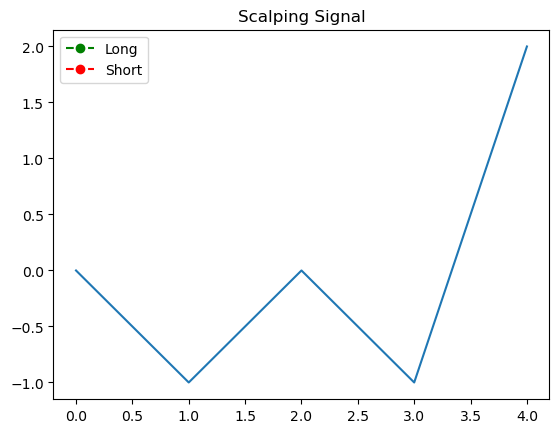

In [6]:
sliding_window_size = 4
data = [0, -1, 0, -1, 2]
scalping_signal(data, sliding_window_size)

### Next Candle

[0, -1, 0, -1, 2, 6]


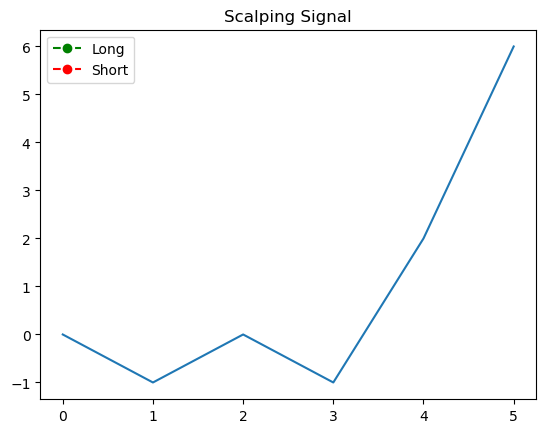

In [7]:
data.append(6)
print(data)
scalping_signal(data, sliding_window_size)

### Next Candle

[0, -1, 0, -1, 2, 6, 2]


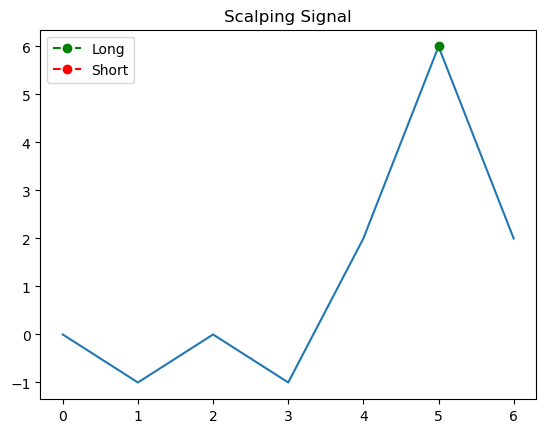

In [8]:
data.append(2)
print(data)
scalping_signal(data, sliding_window_size)

### Next Candle

[0, -1, 0, -1, 2, 6, 2, -6]


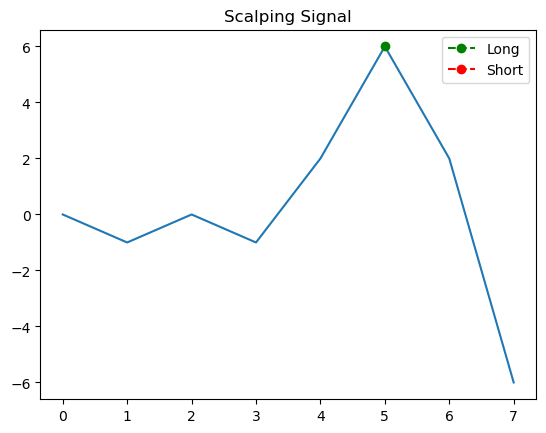

In [9]:
data.append(-6)
print(data)
scalping_signal(data, sliding_window_size)

In [10]:
data.append(1)
print(data)
scalping_signal(data, sliding_window_size)

[0, -1, 0, -1, 2, 6, 2, -6, 1]


### What if the pattern repeats?

[0, -1, 0, -1, 2, 6, 2, -6, 1, 0, -1, 0, -1, 2, 6, 2, -6, 1]


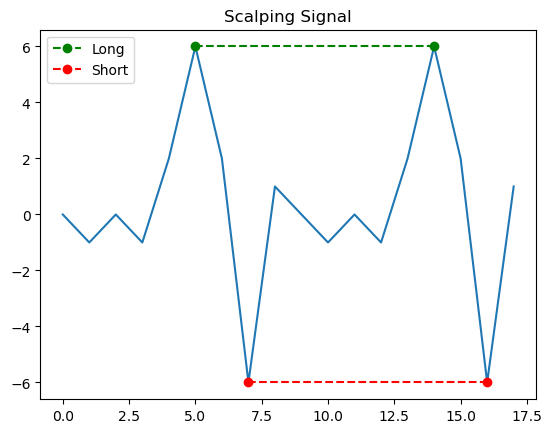

In [11]:
data.extend(data)
print(data)
scalping_signal(data, sliding_window_size)

### What if the pattern randomly shuffles?

[2, 1, -1, 0, -1, 2, 0, 2, -6, -1, -1, 6, 6, 2, 0, -6, 1, 0]


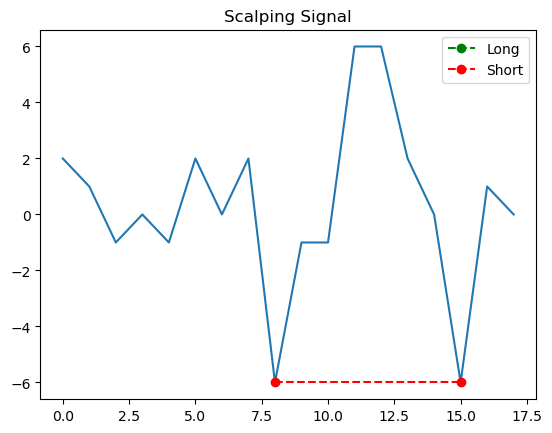

In [12]:
import random 
random.shuffle(data)
print(data)
scalping_signal(data, sliding_window_size)

In [13]:
import random 
random.shuffle(data)
print(data)
scalping_signal(data, sliding_window_size)

[2, 1, -6, 6, 0, 2, 1, -6, 0, 0, -1, 0, -1, -1, 2, -1, 2, 6]
